# Car price prediction

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.pandas.set_option("display.max_columns",None)
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df1=df.drop(['Car_Name'],axis=1)
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Then Handling year columns
df1["Current_year"]=2020
df1["Num_years"]=df1["Current_year"]-df1["Year"]
df1=df1.drop(["Year"],axis=1)

In [8]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Num_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [9]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [10]:
df1=df1.drop(['Current_year'],axis=1)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [11]:
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


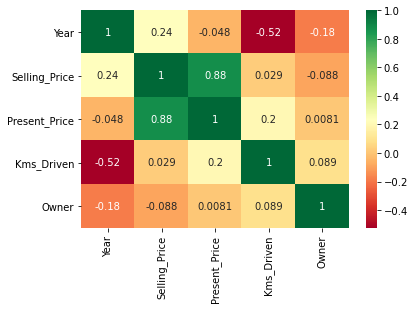

In [12]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [13]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
features=model.feature_importances_
features

array([0.35241427, 0.04545913, 0.00039766, 0.07436446, 0.23848364,
       0.00405479, 0.13319892, 0.15162712])

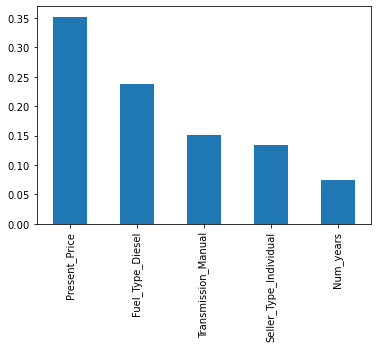

In [14]:
features=pd.Series(model.feature_importances_,index=x.columns)
features.nlargest(5).plot.bar()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [17]:
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.7704582417582417
MSE: 2.5834830117582417
RMSE: 1.6073216889466282


In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf=[1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
randm=RandomizedSearchCV(estimator=reg,param_distributions=random_grid,cv=5,scoring='neg_mean_squared_error',verbose=2,n_iter=10,n_jobs=1,random_state=42)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [21]:
randm.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
randm.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [23]:
randm.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [24]:
randm.best_score_

-4.058741141020609

In [25]:
predictions=randm.predict(X_test)
predictions

array([ 7.1741 ,  0.55034,  5.04788,  9.24848, 16.27695,  4.96423,
        3.3922 ,  0.77585,  4.5787 ,  4.46155,  3.08694,  0.87989,
        5.01451,  7.99615,  7.8607 , 10.53165,  7.35861,  4.1045 ,
        0.50635,  1.48685,  3.95039,  4.63529,  5.53155,  9.5064 ,
        0.28726,  0.76848,  0.50267,  0.63501,  0.5101 ,  4.85524,
        5.23771,  5.85545,  0.51356,  8.84334,  3.49395,  1.16945,
        5.5989 ,  7.40286,  0.26385,  9.2279 ,  9.32929, 19.39848,
        4.92333,  4.09615,  5.4664 , 11.84772,  0.33594,  0.8834 ,
        5.01855,  8.53391,  7.4806 ,  3.55487,  4.738  , 20.48423,
        1.09086,  1.0541 ,  0.51191,  2.77795,  3.6675 ,  1.28415,
        3.92321,  9.0085 ,  3.18912, 20.92135,  4.16965,  5.55341,
       10.08296,  4.89796,  0.53368,  2.99772,  3.40093,  3.08685,
        0.62725,  5.44865,  0.74429,  2.92876,  0.50911,  9.1896 ,
        1.19214,  2.75067,  0.50232, 10.03638,  7.50729,  5.4359 ,
        5.1506 ,  0.92326,  6.29562,  6.05255,  0.45861,  4.94

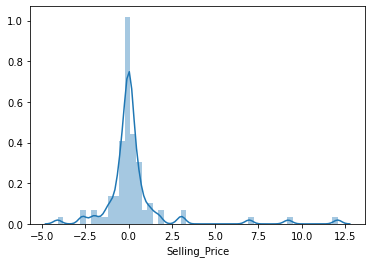

In [26]:
sns.distplot(y_test-predictions)

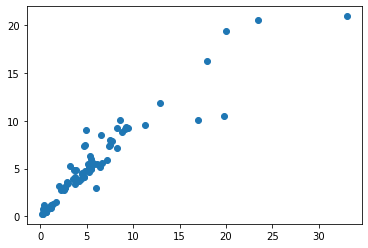

In [27]:
plt.scatter(y_test,predictions)

In [28]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8976384615384616
MSE: 4.021740553628574
RMSE: 2.005427773226594


In [29]:
import pickle
file=open("Car_price_prediction.pkl",'wb')
pickle.dump(randm,file)

In [30]:
randm.score(X_train,y_train)

-0.5087558812023791

In [31]:
randm.score(X_test,y_test)

-4.021740553628574

In [33]:
from sklearn.metrics import r2_score
sco=r2_score(y_test,predictions)
print(sco)

0.8655208678001451


In [34]:
randm.predict(X_test)

array([ 7.1741 ,  0.55034,  5.04788,  9.24848, 16.27695,  4.96423,
        3.3922 ,  0.77585,  4.5787 ,  4.46155,  3.08694,  0.87989,
        5.01451,  7.99615,  7.8607 , 10.53165,  7.35861,  4.1045 ,
        0.50635,  1.48685,  3.95039,  4.63529,  5.53155,  9.5064 ,
        0.28726,  0.76848,  0.50267,  0.63501,  0.5101 ,  4.85524,
        5.23771,  5.85545,  0.51356,  8.84334,  3.49395,  1.16945,
        5.5989 ,  7.40286,  0.26385,  9.2279 ,  9.32929, 19.39848,
        4.92333,  4.09615,  5.4664 , 11.84772,  0.33594,  0.8834 ,
        5.01855,  8.53391,  7.4806 ,  3.55487,  4.738  , 20.48423,
        1.09086,  1.0541 ,  0.51191,  2.77795,  3.6675 ,  1.28415,
        3.92321,  9.0085 ,  3.18912, 20.92135,  4.16965,  5.55341,
       10.08296,  4.89796,  0.53368,  2.99772,  3.40093,  3.08685,
        0.62725,  5.44865,  0.74429,  2.92876,  0.50911,  9.1896 ,
        1.19214,  2.75067,  0.50232, 10.03638,  7.50729,  5.4359 ,
        5.1506 ,  0.92326,  6.29562,  6.05255,  0.45861,  4.94

In [89]:
df.iloc[76]

Car_Name         corolla altis
Year                      2013
Selling_Price              5.5
Present_Price            14.68
Kms_Driven               72000
Fuel_Type               Petrol
Seller_Type             Dealer
Transmission            Manual
Owner                        0
Name: 76, dtype: object

In [88]:
X_test.tail()

,Present_Price,Kms_Driven,Owner,Num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
240,9.40,32322,0,8,1,0,0,1
76,14.68,72000,0,7,0,1,0,1
145,0.81,19000,0,8,0,1,1,1
300,5.90,5464,0,4,0,1,0,1
135,0.74,5000,0,5,0,1,1,1


In [95]:
randm.predict([[14.68,72000,0,8,1,0,0,1]])

array([8.37195])